In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import collections
import itertools 


import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

from sklearn.utils import resample
import string

In [2]:
!pip install nltk

You should consider upgrading via the 'c:\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [ ]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
df= pd.read_csv('flipkart_product.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [6]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [7]:
df.drop(['crawl_timestamp', 'product_url','pid','retail_price','image','is_FK_Advantage_product','discounted_price','product_rating','overall_rating','product_specifications'], axis='columns', inplace=True)

In [8]:
df.drop(['uniq_id'],axis='columns', inplace=True)
df.head()


,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons


In [9]:
df.shape

(20000, 4)

In [10]:
df.isnull().sum()

product_name                0
product_category_tree       0
description                 2
brand                    5864
dtype: int64

In [11]:
df=df[df['description'].notna()]

In [12]:
df.shape

(19998, 4)

In [13]:
#Nan values in description has to be removed as it is only useful column which will help in predictions
df = df[df['description'].notna()]
#also removing duplicates
df = df.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
df = df.reset_index(drop=True)

In [14]:
df.shape

(17539, 4)

**Analysing Brands**

In [15]:
#getting list of unique brand
brands=list(df['brand'].unique())

brand_names = [] 
brand_count = [] 

for brand in brands:
    #getting the count for that brand
    count = np.sum(df.loc[:, 'brand'].values == brand)
    if count>=10:
        brand_names.append(brand)
        brand_count.append(count)


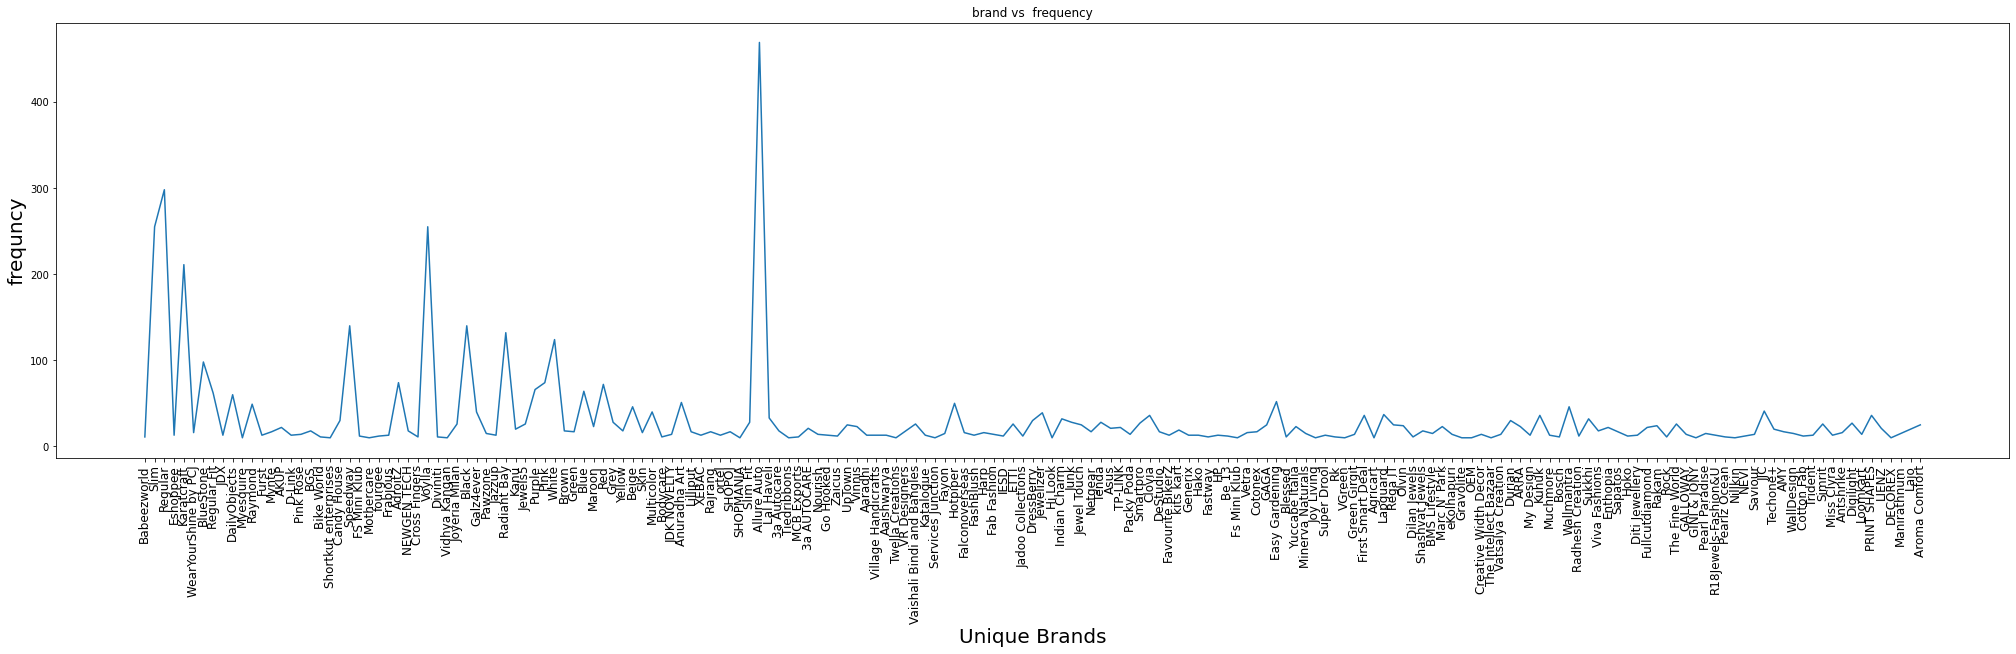

In [16]:

plt.figure(figsize=(35,8))
plt.title("brand vs  frequency")
plt.xlabel("Unique Brands",fontsize=20)
plt.ylabel("frequncy",fontsize=20)
plt.xticks(fontsize=12,rotation=90)
sns.lineplot(x=brand_names, y=brand_count)

plt.show()

**Bar Graph of the most common words in Product Description**

In [17]:
def mostOccured(df):    
    final_text=[]
    text=df["description"].tolist()
    for sentence in text:        
        final_text.append(sentence.lower().split()) 
    final_text = list(itertools.chain(*final_text))
    word_frequency = collections.Counter(final_text)
    word_frequency = word_frequency.most_common(50)
    return word_frequency
        
    

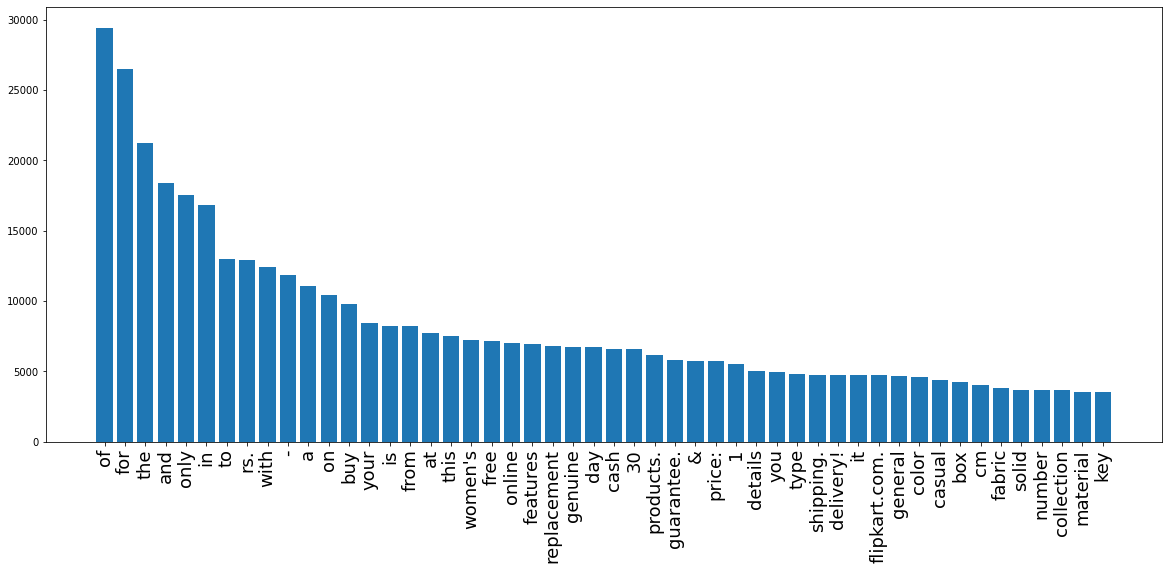

In [18]:
word_frequency=mostOccured(df)
freq_df = pd.DataFrame( word_frequency,columns=['word','count'])



words = freq_df['word']
frequencies =freq_df['count']
plt.figure(figsize=(20,8))
plt.bar(range(len(freq_df)),frequencies, tick_label=words)
plt.xticks(fontsize=18,rotation=90)
plt.show()




In [19]:
#analysing categories to check those who have a count more than 10
categories_df=list(df['product_category_tree'].unique())
for category in categories_df:
    #getting the count for that brand
    count = np.sum(df.loc[:, 'product_category_tree'].values == category)
    if count>=10:
        print(category, "\t",count)



["Footwear >> Women's Footwear >> Casual Shoes >> Boots"] 	 106
["Clothing >> Men's Clothing >> Jeans >> Reckler Jeans"] 	 16
["Jewellery >> Rings"] 	 692
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Shilpkala Tops"] 	 14
["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Herberto Dresses"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Tapyti Tops"] 	 11
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Cation Tops"] 	 39
["Footwear >> Women's Footwear >> Flats"] 	 59
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> DailyObjects Cases & Covers"] 	 60
["Clothing >> Men's Clothing >> Navaksha Men's Clothing"] 	 17
["Footwear >> Women's Footwear >> Heels"] 	 81
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> FabAlley Tops"] 	 14
["Clothing >> Women's Clothing >> Sports & Gym Wear >> Shorts >> Mynte S

["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"] 	 326
["Clothing >> Women's Clothing >> Ethnic Wear >> Kurtas & Kurtis >> Kurtis >> Tetalee Kurtis"] 	 15
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Sun Shades >> AdroitZ Exclusive Barbie Doll Sunshade / curtain..."] 	 34
["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Cutecumber Dresses"] 	 10
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> BMS Lifestyle Cases & Covers"] 	 15
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Clovia Bras"] 	 22
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> Bralux Bras"] 	 10
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Exterior >> Door & Bumper Guards"] 	 17
["Clothing >> Men's Clothing >> T-Shirts >> Nucode T-Shirts"] 	 38
["Clothing >> Men's Clothing >> Shirts >> Casual & Party Wear Shirts >> Marc N' Park Casual & Party W

after analysing obove data we can say that only root or parent node of product_category_tree will be useful for our predictions.so we will extract only root or first node from the string

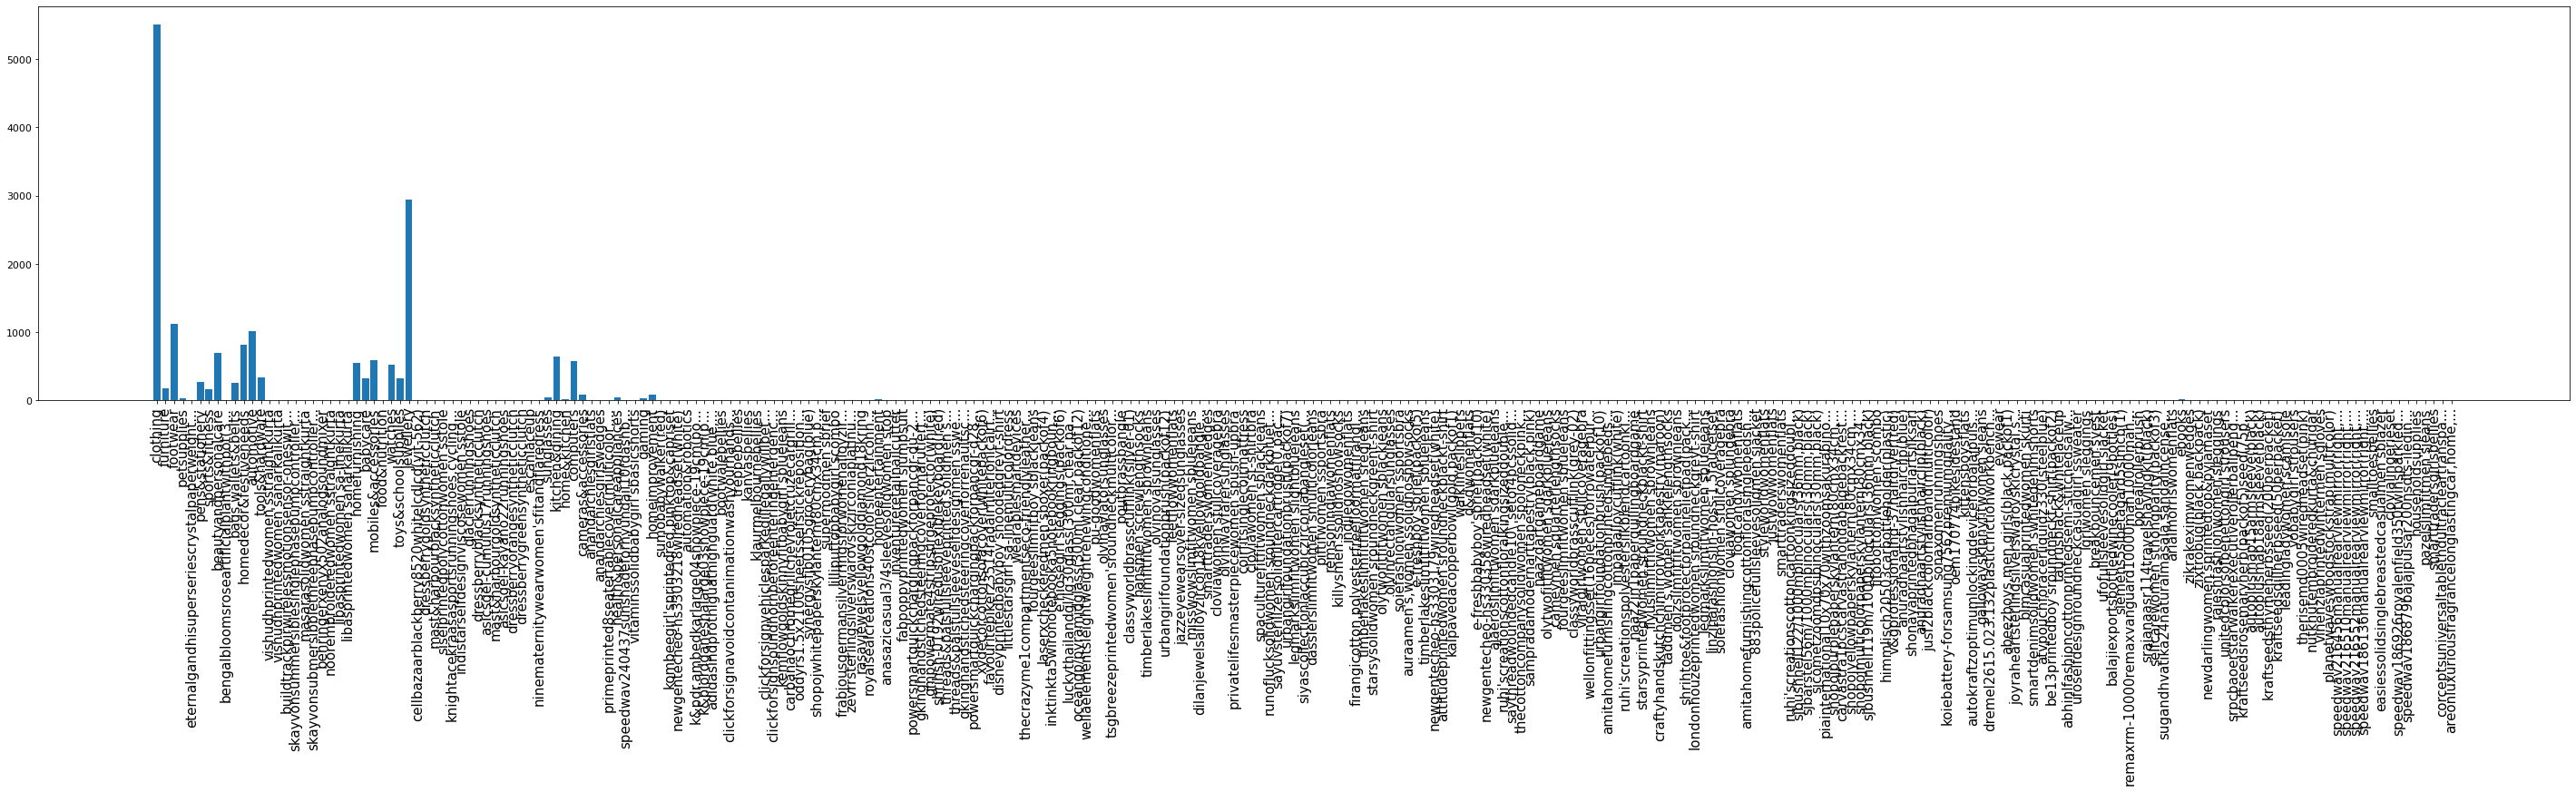

In [20]:
#extracting category
categories=[]
for index, row in df.iterrows():
    
    s=row['product_category_tree']
    s=s.lower()
    s=s.lstrip('["')
    s=s.rstrip('"]')
    s = s.replace(" ","")
    s= s.split(sep='>>')
    s= s[0].rstrip()
    categories.append(s)
categories_count = collections.Counter(categories)

#bar plot of categories vs number of products present in each category
category_name = list(categories_count.keys())
No_of_Product = list(categories_count.values())
plt.figure(figsize=(50,8))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=11)
plt.bar(range(len(categories_count)),No_of_Product, tick_label=category_name)
plt.show()
    


In [21]:
print(len(categories))
print(len(df))


17539
17539


In [22]:
categories

['clothing',
 'furniture',
 'footwear',
 'clothing',
 'petsupplies',
 'eternalgandhisuperseriescrystalpaperweight...',
 'clothing',
 'furniture',
 'footwear',
 'clothing',
 'footwear',
 'clothing',
 'petsupplies',
 'clothing',
 'pens&stationery',
 'clothing',
 'furniture',
 'footwear',
 'clothing',
 'furniture',
 'petsupplies',
 'clothing',
 'clothing',
 'footwear',
 'petsupplies',
 'clothing',
 'sports&fitness',
 'beautyandpersonalcare',
 'clothing',
 'clothing',
 'bengalbloomsroseartificialplantwithpot(3...',
 'clothing',
 'pens&stationery',
 'pens&stationery',
 'pens&stationery',
 'clothing',
 'pens&stationery',
 'clothing',
 'bags,wallets&belts',
 'clothing',
 'footwear',
 'homedecor&festiveneeds',
 'automotive',
 'tools&hardware',
 "vishudhprintedwomen'sstraightkurta",
 "vishudhprintedwomen'sstraightkurta",
 "vishudhprintedwomen'sanarkalikurta",
 'buildtrackpirwirelessmotionsensor-oneswit...',
 'skayvonsummersiblesinglephasepumpcontroller...',
 "masarasolidwomen'sstraightkurta",
 

looling at the above bar plot we can say that there are very few categories those have significant products associated whereas other categories can be considered as noise.Hence we will only use categories which have more number of products for classificaton

<AxesSubplot:title={'center':'Number of products in categories v/s Category'}, xlabel='Product Categories having frequency at least 10', ylabel='Frequency'>

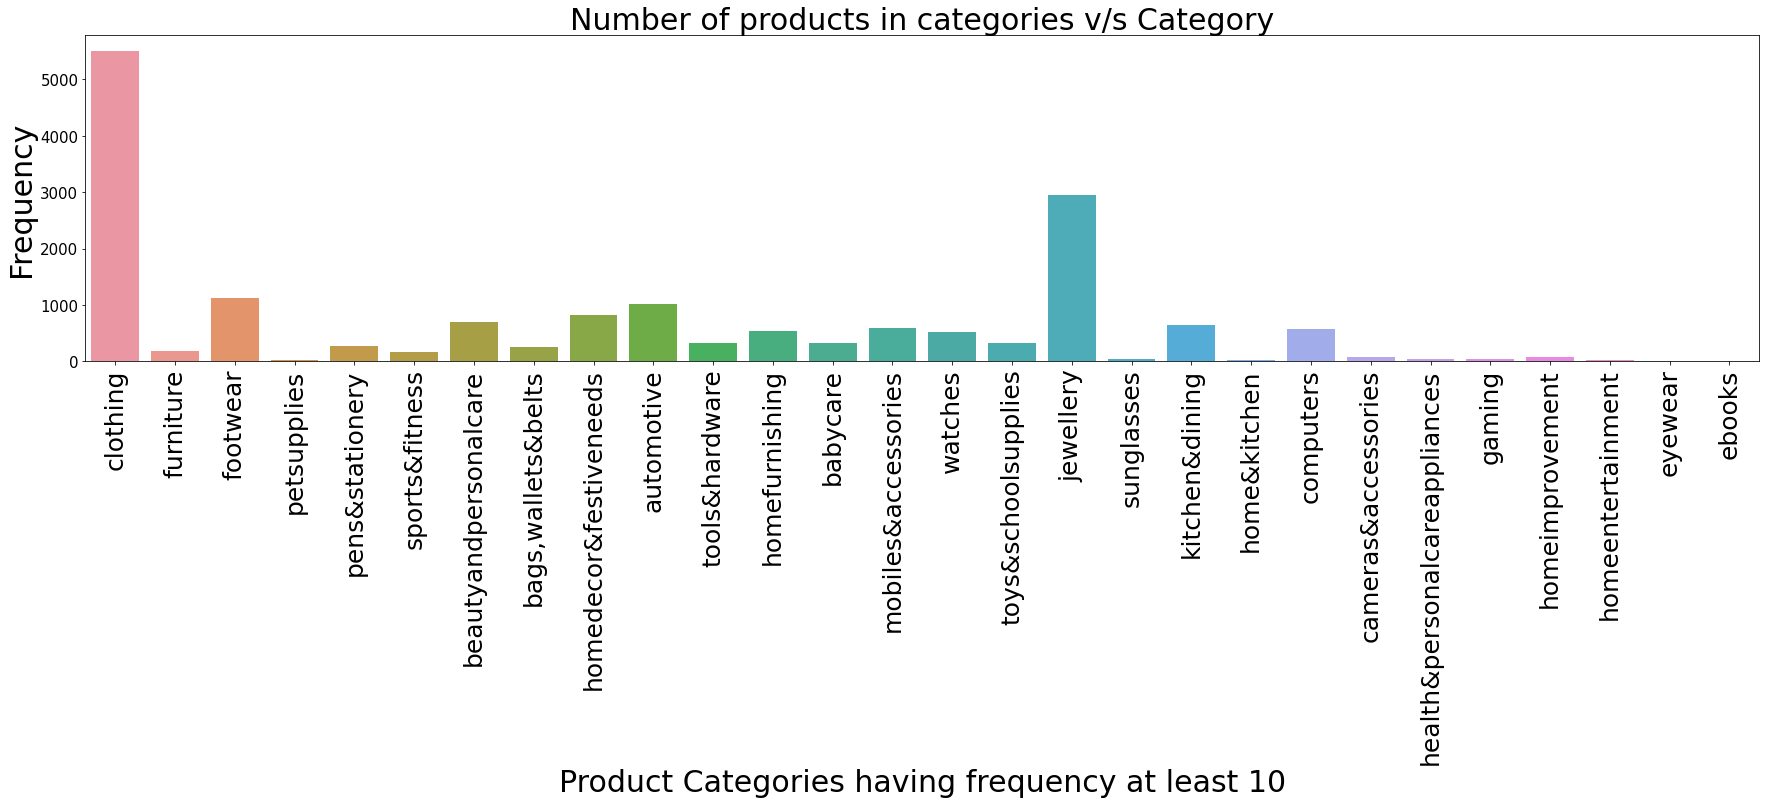

In [23]:
all_category=[]
count=[]

for keys,vals in categories_count.items():
    if (vals >=10):
        all_category.append(keys)
        count.append(vals)

plt.figure(figsize=(30,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories having frequency at least 10",fontsize=30)
plt.ylabel("Frequency",fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=15)
sns.barplot(x=all_category, y=count)


From above plot we can see that some categories can be groupede e.g.,Kitchen & Dining and Home & Kitchen.So lets group them

In [24]:
combined_categories=[None]*len(categories)

for i in range(len(categories)):
    if(categories[i]=='homedecor&festiveneeds'or categories[i]=='furniture' or categories[i]=='homefurnishing' or categories[i]=='kitchen&dining'or categories[i]=='homeimprovement' or categories[i]=='homeentertainment' or categories[i]=='home&kitchen'):
        combined_categories[i]='housefurnishing'
    elif(categories[i]=='gaming' or categories[i]=='pens&stationery' or categories[i]=='toys&schoolsupplies'):
        combined_categories[i]='toys&schoolsupplies'
    elif(categories[i]=='computers' or categories[i]=='cameras&accessories' or categories[i]=='mobiles&accessories' or categories[i]=='health&personalcareappliances'):
        combined_categories[i]='electronics'
    elif  (categories[i]=='beautyandpersonalcare' or categories[i]=='eyewear' or categories[i]=='sunglasses' or categories[i]=='watches' or categories[i]=='bags,wallets&belts'):
        combined_categories[i]='personalaccessories'
    else:
        combined_categories[i] = categories[i]
len(combined_categories)
    

17539

In [25]:
df["classification_category"]=combined_categories
df.head()


,product_name,product_category_tree,description,brand,classification_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,housefurnishing
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies


<AxesSubplot:title={'center':'Number of products in categories v/s Category after Combining'}, xlabel='Product Categories having frequency after combining', ylabel='Frequency'>

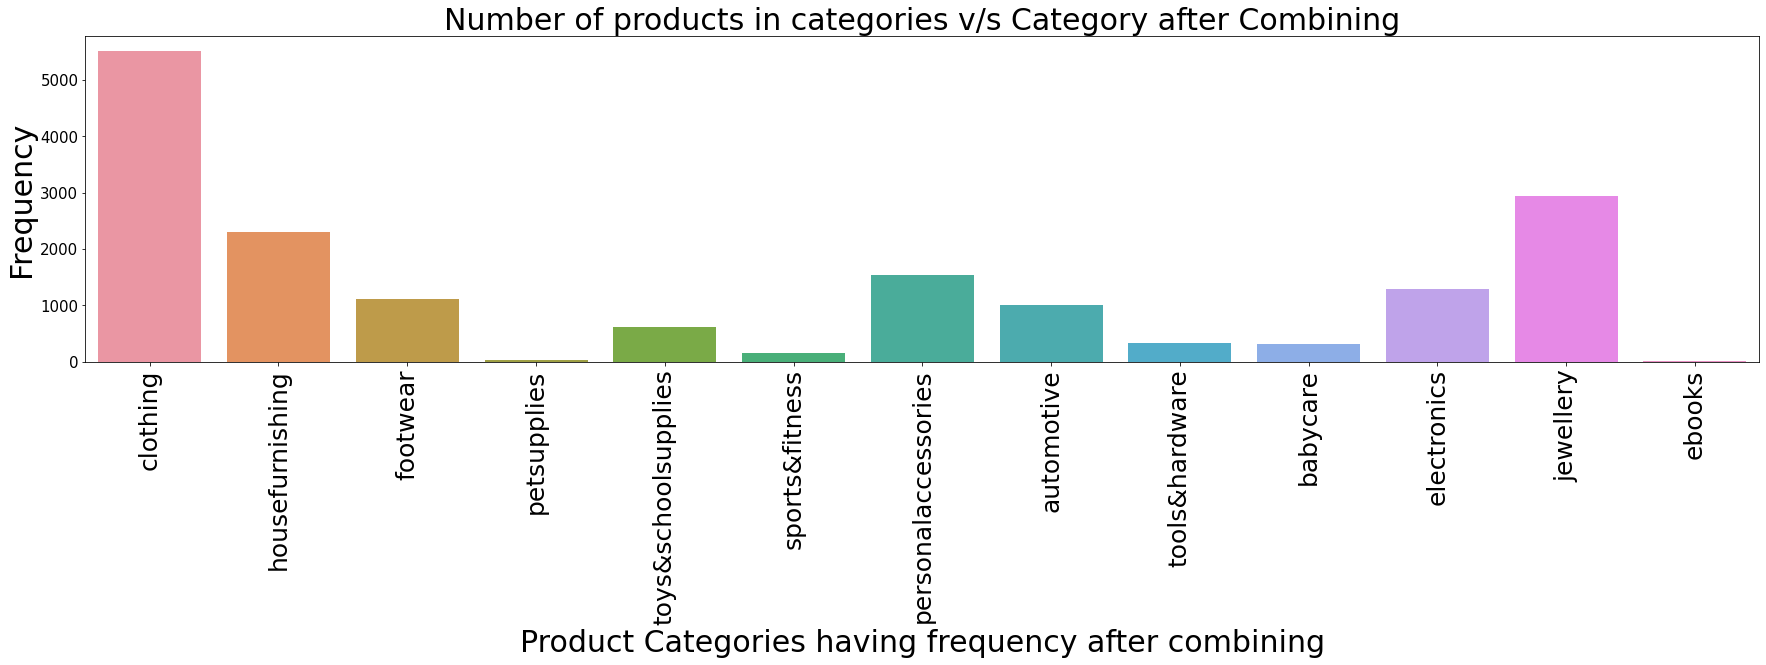

In [26]:
all_category_after_combining=[]
count_after_combining=[]

categories_count_after_combining = collections.Counter(combined_categories)
for keys,vals in categories_count_after_combining.items():
    if (vals >=10):
        all_category_after_combining.append(keys)
        count_after_combining.append(vals)

plt.figure(figsize=(30,6))
plt.title("Number of products in categories v/s Category after Combining", fontsize=30)
plt.xlabel("Product Categories having frequency after combining",fontsize=30)
plt.ylabel("Frequency",fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=15)
sns.barplot(x=all_category_after_combining, y=count_after_combining)

assigning binary code to all rows to make classification easier.1 is assigned to products which comes under these 13 categories else 0

In [27]:
considerd_categories=['clothing','housefurnishing','footwear','petsupplies','toys&schoolsupplies','sports&fitness','personalaccessories','automotive','tools&hardware','babycare','electronics','jewellery','ebooks']
checked_categories=[]
for category in combined_categories:
    if (category in considerd_categories):
        checked_categories.append(1)
    else: checked_categories.append(0)
df["main_category"] = checked_categories
df.head(25)

,product_name,product_category_tree,description,brand,classification_category,main_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,housefurnishing,1
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,eternalgandhisuperseriescrystalpaperweight...,0
6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1
7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,housefurnishing,1
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1
9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1


**Word Clouds**

In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

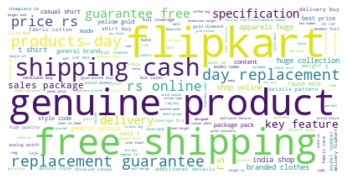

In [36]:
text = ""
for sentence in df['description']:
    sentence=str(sentence)
    splitted=sentence.split()
    for i in range(len(splitted)):
        splitted[i]=splitted[i].lower()
    text+=" ".join(splitted)+" " 

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_font_size=50, max_words=150).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Description cleaning using nltk

In [31]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in custom_stopwords:
            result.append(token)
           
    return result
   
def remove_punct(text):
   
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst


def lemmatization(text):
   
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
       
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
           
        result.append(wordnet.lemmatize(token,pos))
   
    return result

In [39]:
from nltk.corpus import stopwords
df['cleaned_description'] = df['description'].str.lower()
df['cleaned_description']=df['cleaned_description'].apply(lambda X: word_tokenize(X))

custom_stopwords = [w for w in set(stopwords.words("english"))]
stopwords_dataset = ["replacement","shipping","delivery","cash", "rs", "flipkart", "genuine", "details", "guarantee","free", "genuine", "flipkart.com"]
custom_stopwords.extend(stopwords_dataset)

df['cleaned_description'] = df['cleaned_description'].apply(remove_stopwords)
df['cleaned_description']=df['cleaned_description'].apply(lemmatization)
df['cleaned_description'] = df['cleaned_description'].apply(remove_punct)

In [37]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\aashi
[nltk_data]     tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\aashi
[nltk_data]     tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aashi tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to C:\Users\aashi
[nltk_data]     tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
df.head()

In [ ]:
df['cleaned_description'][0]

In [ ]:

        
from nltk.tokenize.treebank import TreebankWordDetokenizer        
for i in range(len(df['cleaned_description'])):
    desc=df['cleaned_description'][i]
    desc=TreebankWordDetokenizer().detokenize(desc)
    df['cleaned_description'][i]=desc



In [ ]:
df.head()

In [ ]:
df.to_csv('unbalanced_preprocessed.csv')

## Oversampling

In [ ]:
balanced_df = df[df['main_category'] == 1]

In [ ]:
balanced_df['classification_category'].value_counts()

In [ ]:
final_balanced_df = {category: balanced_df[balanced_df['classification_category']==category] for category in set(balanced_df['classification_category'])}

oversampled_df = pd.concat([resample(data, n_samples=3000, replace=True, random_state=42) for data in final_balanced_df.values()])
oversampled_df.head()

In [ ]:
oversampled_df['classification_category'].value_counts()

In [ ]:
df.to_csv('oversampled_preprocessed.csv')